# Wheat yield in correlation with climate factors Germany

The aim of this project is to analyzise how different climate factors influence the yield in wheat production

### Aboout the dataset

This dataset contains climate and wheat yield data for Germany, covering the years 1950 to 2023. The data is averaged across 10 random locations to provide a generalized view of climate conditions and wheat yield trends over time. The climate variables include temperature, precipitation, sunshine, evapotranspiration, and drought indicators, all aggregated to match the wheat growing cycle (March-September). Wheat yield is measured in tons per hectare and normalized to account for advancements in agricultural technology. The dataset is structured to support analysis of how climate factors influence wheat yield and to build predictive models.

### Data Dictionary

|Column|Description|
|---|---|
|Unnamed: 0|Index|
|Year|Year of data recording|
|Wheat_yield|Average wheat yield (tons per hectare) for a growth cycle|
|days_above_30degrees|Total number of days with temperatures above 30°C during the wheat growing cycle|
evapotranspiration_average|Average evapotranspiration rate (mm/day) during the growing cycle|
|precipitation_total|Average daily sunshine hours during the wheat growing cycle|
|sunshine_avg|Total sunshine hours during the growing cycle|
|growing_degree_days|Cumulative growing degree days (°C) during the wheat growing cycle|
|SPI|Standardized Precipitation Index (SPI) indicating drought levels during the growing cycle|

In [1]:
# Download libraries
import piplite
await piplite.install(['pandas','numpy','seaborn'])

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns

<ipython-input-2-fa18465ec559>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the data
df = pd.read_csv('wheat.csv')
df.head()

,Year,Wheat_yield,days_above_30degrees,precipitation_sum,sunshine_avg,growing_degree_days,evapotranspiration_sum,SPI
0,1950,25.7,0,326.25,10.09,2098.0,2624.8820,-0.82
1,1951,28.6,0,371.45,9.82,1905.0,2706.2357,-0.13
2,1952,27.5,3,272.27,10.02,2084.0,2531.5615,-1.63
3,1953,27.4,0,354.53,10.33,2070.0,2575.0406,-0.39
4,1954,26.1,0,380.43,9.39,1849.0,2692.3339,0.01


Data already processed in previous notebook

In [4]:
# Column data types
df.dtypes

Year                        int64
Wheat_yield               float64
days_above_30degrees        int64
precipitation_sum         float64
sunshine_avg              float64
growing_degree_days       float64
evapotranspiration_sum    float64
SPI                       float64
dtype: object

In [5]:
# Dataframe shape
df.shape

(74, 8)

In [5]:
# Dataframe column names
df.columns

Index(['Year', 'Wheat_yield', 'days_above_30degrees', 'precipitation_sum',
       'sunshine_avg', 'growing_degree_days', 'evapotranspiration_sum', 'SPI'],
      dtype='object')

#### Descriptive Statistics

In [6]:
# Basic statistic on Dataframe
df.describe()

,Year,Wheat_yield,days_above_30degrees,precipitation_sum,sunshine_avg,growing_degree_days,evapotranspiration_sum,SPI
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1986.500000,30.968919,1.986486,380.017973,9.656351,2066.837838,2700.773499,-0.000270
std,21.505813,3.870292,3.125210,65.966501,0.562773,299.669957,326.374103,1.000496
min,1950.000000,21.800000,0.000000,221.600000,8.580000,1708.000000,2449.256700,-2.400000
25%,1968.250000,28.350000,0.000000,349.570000,9.227500,1922.500000,2575.435375,-0.465000
50%,1986.500000,31.050000,0.500000,373.410000,9.660000,2035.000000,2660.886200,-0.100000
75%,2004.750000,33.675000,2.750000,420.000000,10.045000,2145.750000,2734.517875,0.607500
max,2023.000000,42.000000,14.000000,606.430000,11.030000,4220.000000,5267.703900,3.430000


Data ready for visualization & processing

### Yield compared to main weather factors

In [7]:
# Checking the correlation between features and target
df.corr(min_periods=25)['Wheat_yield'].sort_values()

days_above_30degrees     -0.240587
evapotranspiration_sum   -0.080839
growing_degree_days      -0.078038
sunshine_avg             -0.061839
SPI                      -0.021232
precipitation_sum        -0.021225
Year                      0.127262
Wheat_yield               1.000000
Name: Wheat_yield, dtype: float64

<AxesSubplot:>

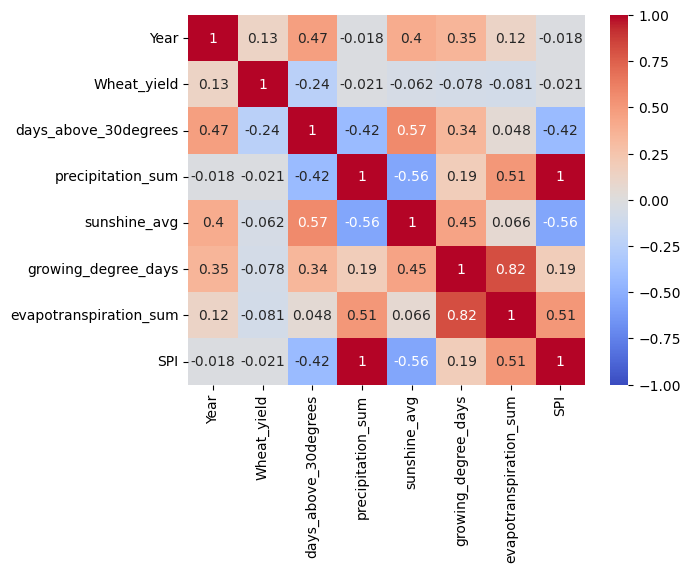

In [8]:
# Visualize the correlation between features and target/label with heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

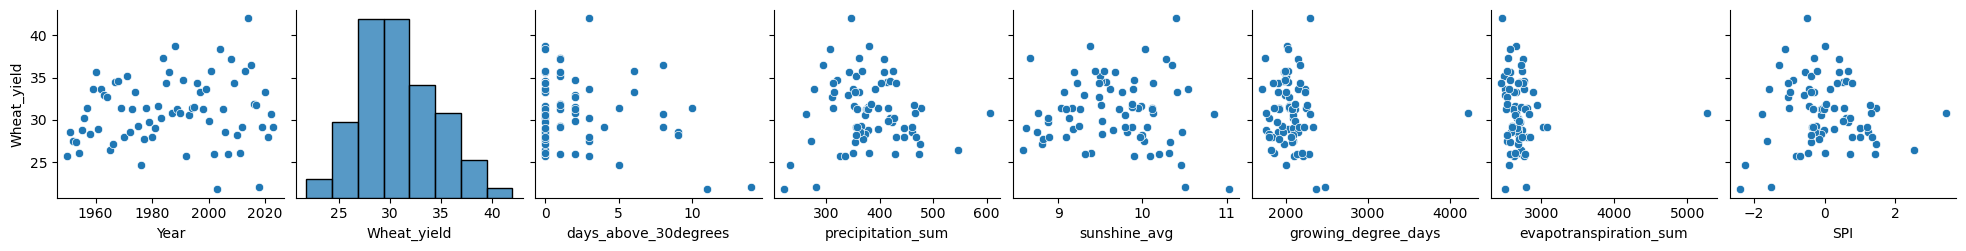

In [16]:
# Visualize the distribution of each feature next to the target
sns.pairplot(data = df, y_vars=['Wheat_yield'])

In [9]:
# Save the labels 
y_train = np.array(df['Wheat_yield'])
# Remove target/label from the Dataframe
df2 = df.drop('Wheat_yield',axis =1)
# Save the names of the features
feature_list = list(df2.columns)
# Save the features
x_train = np.array(df2)


In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x_train ,y_train, test_size = 0.25, random_state = 42)

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 300 decision trees
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [12]:
# Test the model and save resuslt
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.94 degrees.


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.66 %.


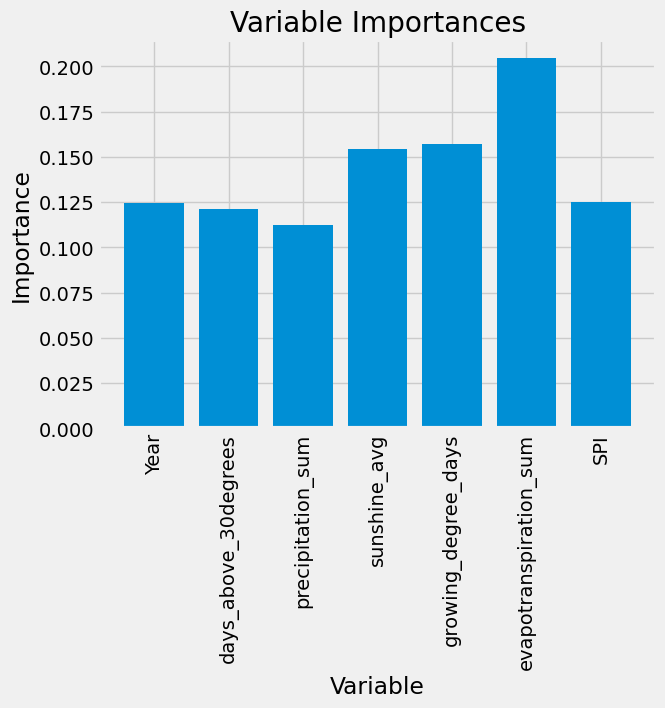

In [15]:
import matplotlib.pyplot as plt
# Get numerical feature importance
importances =rf.feature_importances_

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Thanks to the normalization of the label column in the previous notebook the model has a decent result. The scope of the project has been attained.
The model although trained on a quite small data set has a decent score when it comes to the evaluation metrics : MAE of 2.94 & Accuracy of 90.66%.
Again, due to the small training data (given the nature of the study) this model might be highly overfitted but it serves as a starting point for building a tool to calculate wheat yield/hectare given climate/weather factors.